# 의상
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/42578)

In [ ]:
def solution(clothes):
    answer = 1
    
    # 옷 종류별로 딕셔너리 생성
    closet = {}
    
    # 옷 종류별로 옷 갯수 저장
    for c in clothes:
        try:
            closet[c[1]] += 1
        except:
            closet[c[1]] = 1
            
        
        
    print(closet)
    
    # 옷들의 갯수 + 1을 모두 곱함 (+1은 옷을 안입는 경우)
    for k in closet.keys():
        answer *= closet[k] + 1
    
    # 아무것도 안입는 경우를 빼줌
    answer -= 1
    
    return answer

## 성공
- 딕셔너리를 이용함

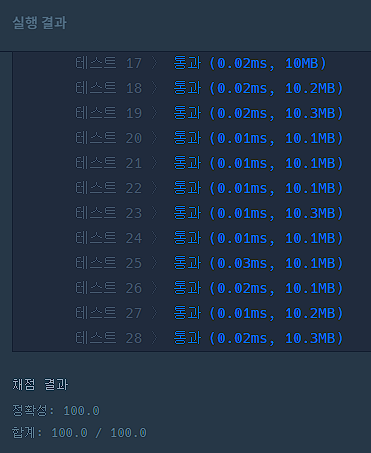

# 다리를 지나는 트럭
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/42583?language=python3)

In [12]:
from collections import deque

def solution(bridge_length, weight, truck_weights):
    answer = 0
    # 트럭 리스트를 큐로 변환
    truck_weights = deque(truck_weights)
    # 다리를 큐로 구현 (길이만큼의 0으로 초기화)
    bridg = deque([0] * bridge_length)
    # 현재 다리 하중
    now_weight = 0
    
    # 모든 트럭이 지나갈 때까지 반복
    while truck_weights:
        # 시간
        answer += 1
        
        # 현재 다리하중에서 나간 무게를 제거
        # 0이 나오면 나간 트럭이 없는것.
        now_weight -= bridg.popleft()
        
        # 현재 다리 하중 + 다음트럭 <= 다리가 견딜 수 있는 무게
        if now_weight + truck_weights[0] <= weight: 
            truck = truck_weights.popleft()
            # 현재 다리 하중에 트럭 무게 더함
            now_weight += truck
            # 다리에 트럭 추가
            bridg.append(truck)
        # 현재 다리하중 + 다음트럭 > 다리가 견딜 수 있는 무게
        else:
            # 다리에 0 추가
            bridg.append(0)
        
        # print(bridg)
    
    # 마지막 트럭이 다리를 지나는 시간을 더해줌
    answer += bridge_length 
    
    return answer

## 성공
- 큐를 이용하여 풀이

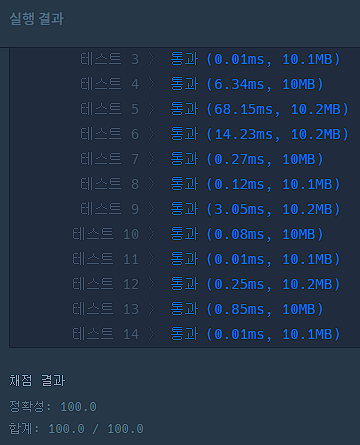

# 베스트 앨범
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/42579?language=csharp)

In [31]:
def solution(genres, plays):
    answer = []
    # 장르별로 딕셔너리 생성
    genres_songs = {}
    # 장르별로 재생횟수 딕셔너리 생성
    genres_plays = {}
    
    # 장르별로 인덱스, 총 재생횟수 저장
    for i, genre in enumerate(genres):
        try:
            genres_songs[genre].append(i)
            genres_plays[genre] += plays[i]
        except:
            genres_songs[genre] = [i]
            genres_plays[genre] = plays[i]
    
    # 장르간 총재생횟수 내림차순 정렬
    genres_plays = dict(sorted(genres_plays.items(), key = lambda x: x[1], reverse = True))
    # 장르별 곡들간 재생횟수 내림차순 정렬
    for k in genres_songs.keys():
        genres_songs[k].sort(key = lambda x: plays[x], reverse = True)
        
    # print(genres_songs)
    # print(genres_plays)
    
    # 장르별로 가장 많이 재생된 두 곡의 인덱스를 answer에 추가
    for k in genres_plays.keys():
        answer.append(genres_songs[k][0])
        try:
            # 장르별 곡이 2개 이상일 경우
            answer.append(genres_songs[k][1])
        except:
            # 장르별 곡이 1개일 경우
            pass
        
    return answer
        

## 성공
- 딕셔너리의 정렬을 활용함.
- 람다식을 통해 다른 딕셔너리나 리스트 등을 참조해 정렬할 수 있음.

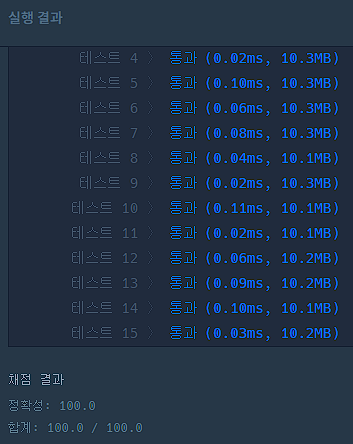

# 순위
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/49191)

In [75]:
players = {}
n_ = 0

# DFS 방식으로 승리(혹은 패배)쪽으로 탐색, 결과를 자기 자신에게 업데이트
# 탐색 후 결정 가능 상태를 업데이트한다.
def dfs_w_or_l(p, w_or_l : str):
    global players, n_
    # 승리(혹은 패배)한 선수들의 리스트
    wl_l = list(players[p][w_or_l])
    # 승리(혹은 패배)한 선수들이 없으면 빈 집합 반환
    if wl_l == []:
        return set()
    
    # 결정 가능 상태 업데이트
    if n_ == len(players[p]['win']) + len(players[p]['lose']) + 1:
        return players[p][w_or_l]
    
    # 플레이어가 순위를 매길 수 있는 상태이면 승리(혹은 패배)한 선수들을 반환
    if players[p]['is_decision'] == True:
        players[p]['is_decision'] = True
    
    # 승리(혹은 패배)한 선수들의 승리(혹은 패배)한 선수들을 재귀적으로 탐색
    # 탐색한 결과를 승패 집합에 업데이트
    for p_ in wl_l:
        players[p][w_or_l].update(dfs_w_or_l(p_, w_or_l))
        
    # 결정 가능 상태 업데이트
    if n_ == len(players[p]['win']) + len(players[p]['lose']) + 1:
        players[p]['is_decision'] = True
    
    # 승리(혹은 패배)한 선수들의 승리(혹은 패배)한 선수들을 반환
    return players[p][w_or_l]


def solution(n, results):
    global players, n_
    n_ = n
    # 선수 번호를 키로 하는 딕셔너리 생성
    # 값은 다른 선수 번호들과의 승패 여부 딕셔너리
    players = { k : {'win' : set(), 'lose' : set() , 'is_decision' : False } for k in range(1, n+1)}
    
    # 승패 결과를 딕셔너리에 저장
    for result in results:
        players[result[0]]['win'].add(result[1])
        players[result[1]]['lose'].add(result[0])
    
    for p in players.keys():
        # 승+패+자신 = 모든 플레이어인 경우 결정 가능
        if n_ == len(players[p]['win']) + len(players[p]['lose']) + 1:
            # 결정 가능 상태를 True로 변경
            players[p]['is_decision'] = True
            continue
        # 승리 상태와 패배 상태를 DFS를 통해 업데이트
        players[p]['win'].update(dfs_w_or_l(p, 'win'))
        players[p]['lose'].update(dfs_w_or_l(p, 'lose'))
        
    # 순위를 매길 수 있는 선수들의 수를 반환
    answer = sum(players[p]['is_decision'] for p in players.keys())
    return answer

In [76]:
print(solution(5, [[4,3],[4,2],[3,2],[1,2],[2,5]]))
print(solution(5, [[1,2],[2,3],[3,4],[4,5]]))
print(solution(5, [[1,2],[2,3],[3,4],[4,5],[2,4],[2,5]]))

2
5
5


## 실패
- 재귀를 통한 DFS방식으로 구현
- 효율성 문제로 실패

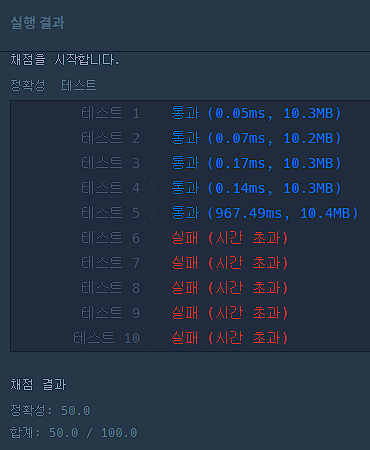

In [77]:
players = {}
n_ = 0

# DFS 방식으로 승리(혹은 패배)쪽으로 탐색, 결과를 자기 자신에게 업데이트
# 탐색 후 결정 가능 상태를 업데이트한다.
def dfs_w_or_l(p, w_or_l : str):
    global players, n_
    # 승리(혹은 패배)한 선수들의 리스트
    wl_l = list(players[p][w_or_l])
    
    # 승리(혹은 패배)한 선수들이 없으면 빈 집합 반환
    if wl_l == []:
        return set()
    
    # 이전에 탐색한 경우 탐색 결과 반환
    if players[p]['is_visit'][w_or_l]:
        return players[p][w_or_l]
    
    # 플레이어가 순위를 매길 수 있는 상태이면 승리(혹은 패배)한 선수들을 반환
    if players[p]['is_decision'] == True:
        return players[p][w_or_l]
    
    # 승리(혹은 패배)한 선수들의 승리(혹은 패배)한 선수들을 재귀적으로 탐색
    # 탐색한 결과를 승패 집합에 업데이트
    for p_ in wl_l:
        players[p][w_or_l].update(dfs_w_or_l(p_, w_or_l))
        
    # 결정 가능 상태 업데이트
    if n_ == len(players[p]['win']) + len(players[p]['lose']) + 1:
        players[p]['is_decision'] = True
    
    players[p]['is_visit'][w_or_l] = True
    # 승리(혹은 패배)한 선수들의 승리(혹은 패배)한 선수들을 반환
    return players[p][w_or_l]


def solution(n, results):
    global players, n_
    n_ = n
    # 선수 번호를 키로 하는 딕셔너리 생성
    # 값은 다른 선수 번호들과의 승패 여부 집합, 결정 가능 여부, 방문 여부 딕셔너리
    # 집합으로 만든 이유는 중복된 선수 번호를 저장하지 않기 위함
    players = { k : {'win' : set(), 'lose' : set() , 'is_decision' : False, 'is_visit':{'win':False, 'lose':False}} for k in range(1, n+1)}
    
    # 승패 결과를 딕셔너리에 저장
    for result in results:
        players[result[0]]['win'].add(result[1])
        players[result[1]]['lose'].add(result[0])
    
    for p in players.keys():
        # 승+패+자신 = 모든 플레이어인 경우 결정 가능
        if n_ == len(players[p]['win']) + len(players[p]['lose']) + 1:
            # 결정 가능 상태를 True로 변경
            players[p]['is_decision'] = True
            continue
        # 승리 상태와 패배 상태를 DFS를 통해 업데이트
        players[p]['win'].update(dfs_w_or_l(p, 'win'))
        players[p]['lose'].update(dfs_w_or_l(p, 'lose'))
        
    # 순위를 매길 수 있는 선수들의 수를 반환
    answer = sum(players[p]['is_decision'] for p in players.keys())
    return answer

## 성공
- 가장 중요한 탐색 여부 확인을 빼먹었음.
- 탐색시, 탐색여부 확인이 없을 경우 같은곳을 계속 방문할 가능성이 있음.

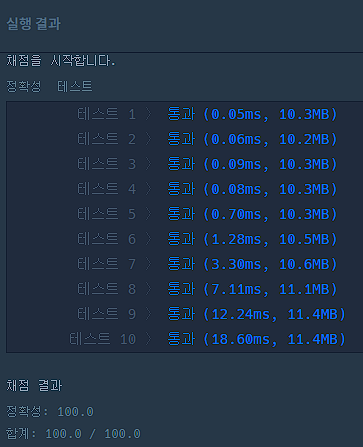

# 10. 가장 먼 노드
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/49189)

In [ ]:
from collections import deque

def solution(n, edges):
    # BFS를 위한 큐 생성
    qu = deque()
    # 각 노드의 1부터의 거리를 저장하는 리스트, 방문여부를 확인하기 위해 -1로 초기화
    distances = [-1] * (n+1)
    # 각 노드의 연결된 노드들을 저장하는 리스트
    nodes = [[] for _ in range(n+1)]
    
    # nodes = [[]] * (n+1)  -> 참조가 복사되어서 같은 리스트가 n+1개 생성됨
    
    # print(edges)
    # print(nodes)
    
    # 각 노드에 간선들을 저장
    for edge in edges:
        # print(edge)
        nodes[edge[0]].append(edge[1])
        nodes[edge[1]].append(edge[0])
        # print(nodes)
    
    # print(nodes)
    
    # 1번 노드를 큐에 삽입
    qu.append(1)
    # 1번 노드의 거리를 0으로 설정
    distances[1] = 0
    
    # 큐가 빌 때까지 반복
    while qu:
        # 큐에서 노드를 꺼냄
        node = qu.popleft()
        # 노드의 간선들을 확인
        for next_node in nodes[node]:
            # 방문하지 않은 노드인 경우
            if distances[next_node] == -1:
                # 거리를 현재 노드의 거리 + 1로 설정
                distances[next_node] = distances[node] + 1
                # 큐에 삽입
                qu.append(next_node)
                
    # print(distances)
    
    # 최대 거리를 구함
    max_distance = max(distances)    
    # 최대 거리를 가진 노드의 수를 구함
    answer = distances.count(max_distance)
    
    return answer

In [ ]:
solution(6, [[3, 6], [4, 3], [3, 2], [1, 3], [1, 2], [2, 4], [5, 2]])

3

# 성공
- 알고리즘 자체는 빠르게 설계함.
- 원인 모를 버그로 인해 distances, nodes를 살펴봄.
- nodes 리스트의 값이 이상해져있음.
- 간선들을 저장할 빈 2차원 리스트를 초기화 할 때 문제발생.
    - ```[[]] * (n+1)``` 방식으로 초기화 할 경우.
    - 모든 리스트가 참조복사되어, 모든 값이 같이 들어감.
    - ```nodes = [[] for _ in range(n+1)]``` 방식의 컴프리 헨션으로 바꿈.

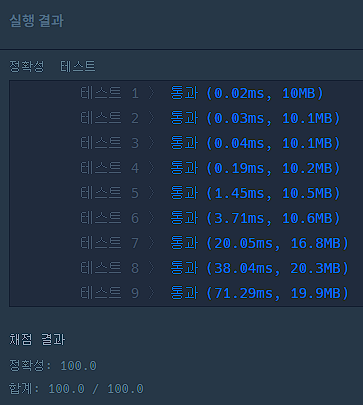